# Desafío - Naive Bayes
## Daniela Hurtado M

__Descripción__

* En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los csv se encuentra en la carpeta dump dentro del proyecto.
* Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
* En base a esta información, se les pide un modelo generativo que pueda predecir el género de una canción a patir de la letra de una canción.
* Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad trabajaremos con un Multinomial Naive Bayes.

## Ejercicio 1: Preparar el ambiente de trabajo

* Importe los módulos numpy , pandas , matplotlib , seaborn , glob y os siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump .
* Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormente genere un objeto pd.DataFrame que contenga todos los csv.
* Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [1]:
# Librerías clasicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# librerías para la concatenación de archivos
import os
import glob

In [2]:
# utilizamos getcwd para obtener la ruta de nuestro archivo
os.getcwd()

'C:\\Users\\Victor\\Desktop\\new\\3.Machine Learning'

In [3]:
# Obtenemos la ruta de las canciones de la carpeta dump
lista_dump = glob.glob(os.getcwd() + '/dump/*.csv')
lista_dump

['C:\\Users\\Victor\\Desktop\\new\\3.Machine Learning/dump\\anthrax_scrape.csv',
 'C:\\Users\\Victor\\Desktop\\new\\3.Machine Learning/dump\\a_tribe_called_quest_scrape.csv',
 'C:\\Users\\Victor\\Desktop\\new\\3.Machine Learning/dump\\black_star_scrape.csv',
 'C:\\Users\\Victor\\Desktop\\new\\3.Machine Learning/dump\\bob_dylan_scrape.csv',
 'C:\\Users\\Victor\\Desktop\\new\\3.Machine Learning/dump\\britney_spears_scrape.csv',
 'C:\\Users\\Victor\\Desktop\\new\\3.Machine Learning/dump\\bruce_springsteen_scrape.csv',
 'C:\\Users\\Victor\\Desktop\\new\\3.Machine Learning/dump\\cannibal_corpse_scrape.csv',
 'C:\\Users\\Victor\\Desktop\\new\\3.Machine Learning/dump\\carly_rae_jepsen_scrape.csv',
 'C:\\Users\\Victor\\Desktop\\new\\3.Machine Learning/dump\\deicide_scrape.csv',
 'C:\\Users\\Victor\\Desktop\\new\\3.Machine Learning/dump\\de_la_soul_scrape.csv',
 'C:\\Users\\Victor\\Desktop\\new\\3.Machine Learning/dump\\dr._dre_scrape.csv',
 'C:\\Users\\Victor\\Desktop\\new\\3.Machine Learning/

In [4]:
# Generamos una lista nueva y le agregamos los csv
lista_dump2=[]
for f in lista_dump:
    lista_dump2.append(pd.read_csv(f, index_col = None, header= 0).drop(columns='Unnamed: 0'))

In [5]:
lista_dump2

[           0      1                                     2  \
 0    Anthrax  metal                            Deathrider   
 1    Anthrax  metal                   Metal Thrashing Mad   
 2    Anthrax  metal                          I'm Eighteen   
 3    Anthrax  metal                                 Panic   
 4    Anthrax  metal                            Subjugator   
 5    Anthrax  metal                     Soldiers Of Metal   
 6    Anthrax  metal                      Death From Above   
 7    Anthrax  metal                               Anthrax   
 8    Anthrax  metal                        Howling Furies   
 9    Anthrax  metal                                A.I.R.   
 10   Anthrax  metal                          Lone Justice   
 11   Anthrax  metal                              Madhouse   
 12   Anthrax  metal                  S.S.C./Stand Or Fall   
 13   Anthrax  metal                             The Enemy   
 14   Anthrax  metal                            Aftershock   
 15   An

In [6]:
# Concatenamos la lista_dump2 para obtener nuestro df
df = pd.concat(lista_dump2)
# revisamos con un head
df.head(2)

,0,1,2,3
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...


In [7]:
# Revisamos las dimensiones
df.shape

(9489, 4)

In [8]:
# Renombramos las columnas 
df.columns= ['artist','genre', 'song', 'lyric']
df.head()

,artist,genre,song,lyric
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


In [9]:
# Consultamos la cantidad de canciones segun el género con un value_counts
df['genre'].value_counts()

rock      4140
hiphop    2535
metal     1582
pop       1232
Name: genre, dtype: int64

## Ejercicio 2: Descripción de los datos

* Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la
siguiente información:
    * La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.
    * La cantidad de canciones registradas en cada género, ordenados de mayor a menor.
* Comente sobre las principales tendencias.

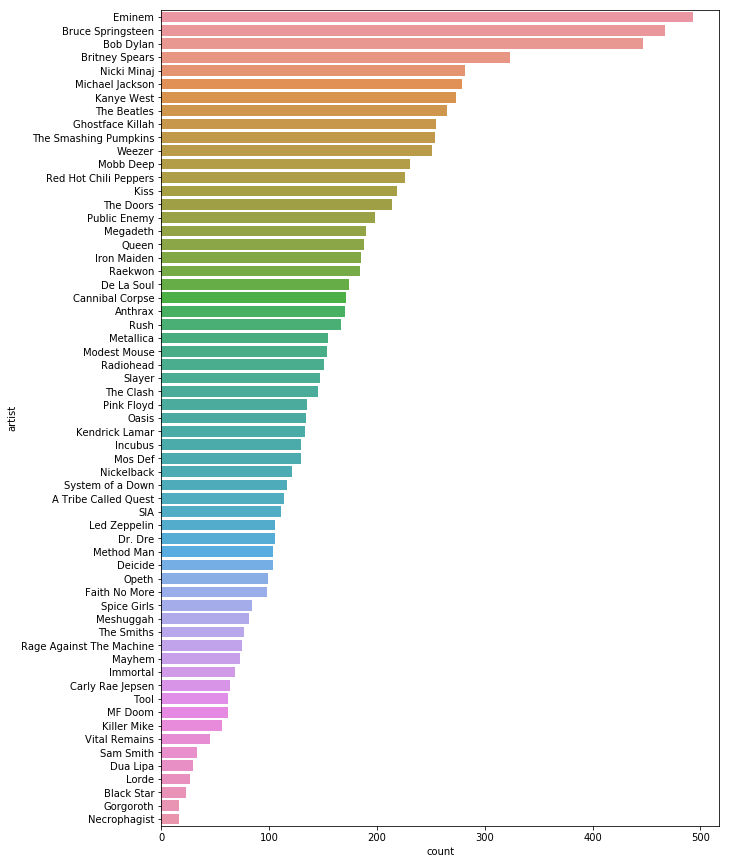

In [10]:
plt.figure(figsize=(10,15))
sns.countplot(y = df['artist'],
                 order = df['artist'].value_counts().index) 

* Según la gráfica, el artista con mayor cantidad de canciones en nuestra base de datos es Eminem, le sigue Bruce Springsteen y Bob Dylan.

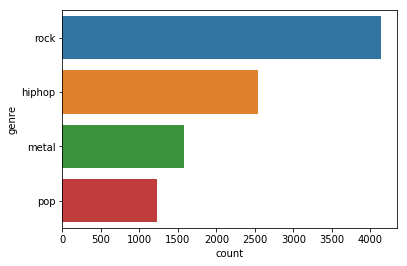

In [11]:
sns.countplot(y = df['genre'],
                 order = df['genre'].value_counts().index) 

* El genero musical que domina la tendencia es el rock

## Ejercicio 3: Matriz de ocurrencias

* Importe la clase CountVectorizer dentro de los módulos feature_extraction.text de la librería sklearn . Lea la documentación asociada a ésta. ¿Cuál es el objetivo de esta clase?

* Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.

* Genere una función que replique el procedimiento para cada uno de los géneros.

* Comente sobre las principales características de cada género en cuanto a sus palabras.

In [12]:
# Importamos la clase CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

* CountVectorizer proporciona una manera simple de tokenizar una colección de documentos de texto y construir un vocabulario de palabras conocidas. Pero también se puede codificar nuevos documentos usando este vocabulario.

In [13]:
# Aplicamos la clase para extraer las 100 palabras mas repetidas
count_vectorizer = CountVectorizer(stop_words='english', max_df=.1, max_features=100)
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.1, max_features=100, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [49]:
lista=df['lyric']
count_vectorizer_fit = count_vectorizer.fit_transform(lista)
words = count_vectorizer.get_feature_names()
words_freq = count_vectorizer_fit.toarray().sum(axis=0)
words_freq

array([2476, 1040, 1464, 1768, 1390, 1159, 1099, 1574, 1232, 1401, 1577,
       1200, 1088, 1049, 1344, 1268, 1420, 1371, 1248, 1284, 1170, 1070,
       1309, 1045, 1199, 1903, 1478, 1176, 1060, 1177, 1350, 1208, 1466,
       1028, 1133, 1389, 1623, 1041, 1138, 1119, 1042, 1675, 1260, 1375,
       1490, 1284, 1148, 1714, 1295, 1129, 1619, 2202, 1165, 1085, 1029,
       1054, 1410, 1466, 1041, 1092, 1240, 3057, 1757, 2719, 1040, 1475,
       1318, 1130, 1048, 1275, 2165, 1316, 1165, 1276, 1169, 1394, 1524,
       1247, 1190, 1378, 1581, 1426, 1061, 2010, 1118, 1286, 2146, 1072,
       1158, 1557, 1187, 1175, 1030, 1151, 1401, 1051, 1311, 1411, 1784,
       1280], dtype=int64)

### Palabras mas repetidas en toda la data

In [51]:
# Palabras mas repetidas en las canciones de toda la data
lista_1=list(zip(words,words_freq))
df_1 = pd.DataFrame(lista_1)
df_2=df_1.rename(columns={0:'Words',1:'Freq'})
df_3=df_2.sort_values('Freq',ascending=False)
df_3.head(100)

,Words,Freq
61,niggas,3057
63,ooh,2719
0,ah,2476
51,la,2202
70,rock,2165
86,uh,2146
83,tonight,2010
25,everybody,1903
98,yes,1784
3,believe,1768


In [ ]:
# Otra forma de hacerlo dentro de a funcion
#paired = list(map(lambda x, y: (x,y), words, words_freq.tolist()))
#reverse_sort = sorted(paired, key = lambda x: (-x[1], x[0]))
#words_list = [x[0] for x in reverse_sort]
#first_100 = words_list[0:100]

### Palabras mas repetidas por genero

In [52]:
def first_100_words_in(x):
    df_genre = df.query('genre == "{}"'.format(x))
    lista_de_textos = df_genre['lyric'].tolist()
    
    # Implementamos los pasos fit y transform
    count_vectorizer_fit = count_vectorizer.fit_transform(lista_de_textos)

    # Extraemos tokens (palabras)
    words = count_vectorizer.get_feature_names()

    # extraemos frecuencia
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    
    lista_1=list(zip(words,words_freq))
    df_1 = pd.DataFrame(lista_1)
    df_2=df_1.rename(columns={0:'Words',1:'Freq'})
    df_3=df_2.sort_values('Freq',ascending=False)
    df_3.head(100)
    
  
    return df_3.head(100)

### Rock

In [53]:
first_100_words_in('rock')

,Words,Freq
39,hey,1746
56,ooh,1444
0,ah,1247
44,la,1083
84,tonight,1016
35,gotta,952
4,better,879
98,yes,823
62,really,802
19,did,801


### Hiphop

In [54]:
first_100_words_in('hiphop')

,Words,Freq
29,ghostface,731
18,dre,715
31,ha,708
0,ah,614
41,la,610
74,shady,563
37,kanye,548
38,killah,519
62,ooh,518
50,mama,517


### Metal

In [55]:
first_100_words_in('metal')

,Words,Freq
34,gonna,414
94,war,377
40,hate,348
28,fight,326
69,run,317
14,coming,285
61,new,272
57,long,271
17,dark,250
2,believe,247


### Pop

In [56]:
first_100_words_in('pop')

,Words,Freq
0,ah,569
59,la,489
66,ma,427
74,niggas,366
72,na,359
25,dance,342
85,shit,337
48,gone,331
78,people,323
13,break,303


# Ejercicio 4: Entrenamiento del Modelo

* Importe MultinomialNB , train_test_split , Pipeline , confusion_matrix y classification_report .
* Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria.
* Monte el modelo dentro de un Pipeline , donde el primer paso es implementar CountVectorizer y el segundo sea ejecutar el clasificador MultinomialNB .
* A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones correspondientes? 

['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking
light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for
two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move
bitch, get out the way Get out the way bitch, get out the way', # Ludacris -
Move B*tch
'Sexual violence doesn’t start and end with rape It starts in our books and
behind our school gates' # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm
the one who had to learn to \
build a heart made of armor From the girl who made you soup and tied your
shoes when you were hurting\
You are not deserving, you are not deserving" #Banks -
Drowning

* Genere una predicción implementando la muestra de validación y contraste las predicciones del modelo con las etiquetas verdaderas. 
* Reporte las principales métricas.

In [19]:
df.head()

,artist,genre,song,lyric
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


In [20]:
# Importe MultinomialNB , train_test_split , Pipeline , confusion_matrix y classification_report .

from sklearn.naive_bayes import MultinomialNB # necesaria para aplicar el modelo de Multinomial Naive Bayes
from sklearn.pipeline import Pipeline # necesaria para generar los Pipeline
from sklearn.model_selection import train_test_split # genera matrices de entrenamiento y validación
from sklearn.metrics import confusion_matrix #  utilizado para evaluar métrica de desempeño
from sklearn.metrics import classification_report # genera reporte sobre métrica de desempeño del modelo

In [21]:
# Separamos los vectores objetivo y matriz atributos
y_vec = df.loc[:, 'genre']
x_mat = df.loc[:, 'lyric']

# Generamos conjunto de entrenamiento (train) y validación (test).
X_train, X_test, y_train, y_test = train_test_split(x_mat, y_vec, test_size=.4, random_state= 23748)

In [22]:
pipeline_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clas', MultinomialNB()),
])

In [31]:
texto = ['I got a place in the underworld', 
         'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', 
         "Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", 
        'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', 
         'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates' 
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting  You are not deserving, you are not deserving"]

In [66]:
y_hat_texto = pipeline_model.predict(texto)
# prediccion del texto
y_hat_texto

array(['rock', 'metal', 'rock', 'hiphop', 'rock'], dtype='<U6')

In [67]:
# diccionario
#pipeline_model.named_steps['vect'].vocabulary_

In [65]:
pipeline_model.fit(X_train, y_train)
#prediccion en X_test
y_hat = pipeline_model.predict(X_test)

In [68]:
df['genre'].value_counts()

rock      4140
hiphop    2535
metal     1582
pop       1232
Name: genre, dtype: int64

In [69]:
# Matriz de confusión
target_label = ['rock', 'metal', 'pop', 'hiphop']
cnf = confusion_matrix(y_test, y_hat, labels=target_label)/len(y_test)
cnf



array([[0.36880927, 0.01685985, 0.028451  , 0.0142255 ],
       [0.04820864, 0.11354057, 0.00368809, 0.00579557],
       [0.0524236 , 0.00131718, 0.0524236 , 0.02002107],
       [0.01527924, 0.00105374, 0.00605901, 0.25184405]])

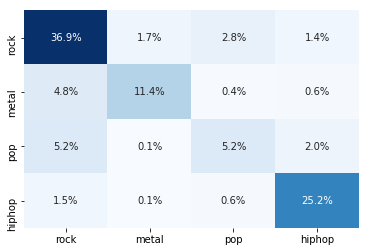

In [70]:
# Implementamos un mapa de calor definiendo las clases
sns.heatmap(cnf, xticklabels=target_label,
yticklabels=target_label,
# generamos las anotaciones en términos porcentuales
annot=True, fmt=".1%",
# evitamos la barra y cambiamos el colormap
cbar=False, cmap='Blues');

In [71]:
# generar un reporte de métricas de precisión, recall y f1
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

      hiphop       0.86      0.92      0.89      1041
       metal       0.86      0.66      0.75       650
         pop       0.58      0.42      0.48       479
        rock       0.76      0.86      0.81      1626

   micro avg       0.79      0.79      0.79      3796
   macro avg       0.76      0.71      0.73      3796
weighted avg       0.78      0.79      0.78      3796

